# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
from maddpg_agent import MADDPG
import time

In [2]:
env = UnityEnvironment(file_name="env/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Create Agents

In [5]:
m_agents = MADDPG(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=10)

### 4. Start Training Process

In [6]:
def run_training(n_episodes=1000, print_every = 100):
    """MADDPG Algorithm.
    Params
    ======
        n_episodes (int): maximum number of training episodes
        print_every (int): frequency of printing information throughout iteration """
    current_score = []
    running_mean = []
    scores_deque = deque(maxlen=print_every)
    solved = False
    startTime = time.time()
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        m_agents.reset()                                   # reset the environment
        states = env_info.vector_observations              # get the current state (for each agent)
        scores = np.zeros(num_agents)                      # initialize the score (for each agent)
        tick = time.time()
        while True:
            actions = m_agents.act(states)                  # all actions between -1 and 1
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            m_agents.step(states, actions, rewards, next_states, dones) # take step with agent (including learning)
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        
        #introduces again a Experience Learning step - to fasten up training
        #agent.learn_from_experience()
        
        scores_deque.append(np.max(scores))       # save most recent score
        current_score.append(np.max(scores))             # save most recent score
        running_mean.append(np.mean(scores_deque))
        print('\rEpisode {}\tAverage Score: {:.2f}\tCurrent Score: {:.2f}'.format(i_episode, np.mean(scores_deque),np.max(scores)), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tCurrent Score: {:.2f}'.format(i_episode, np.mean(scores_deque), np.max(scores)))
            m_agents.saveCheckPoints()
        
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            m_agents.saveCheckPoints()
            break
        
        if np.mean(scores_deque)>= 0.5 and not solved:
            solved = True
            print("\x1b[31m\n************ ENVIRONMENT_SOLVED ************\x1b[0m")
            print('\nsolved in {:d} episodes!\It took {:.2f} Minutes to solve the task'.format(i_episode, (time.time()-startTime)/60))
            
    return current_score, running_mean

In [7]:
scores, running_mean = run_training(n_episodes = 1000)

Episode 50	Average Score: 0.00	Current Score: 0.00
Episode 100	Average Score: 0.00	Current Score: 0.00
Episode 150	Average Score: 0.01	Current Score: 0.00
Episode 200	Average Score: 0.01	Current Score: 0.00
Episode 250	Average Score: 0.00	Current Score: 0.00
Episode 300	Average Score: 0.02	Current Score: 0.00
Episode 350	Average Score: 0.06	Current Score: 0.10
Episode 400	Average Score: 0.10	Current Score: 0.10
Episode 450	Average Score: 0.08	Current Score: 0.10
Episode 500	Average Score: 0.10	Current Score: 0.09
Episode 550	Average Score: 0.10	Current Score: 0.10
Episode 600	Average Score: 0.14	Current Score: 0.10
Episode 650	Average Score: 0.15	Current Score: 0.30
Episode 700	Average Score: 0.15	Current Score: 0.30
Episode 750	Average Score: 0.26	Current Score: 0.50
Episode 800	Average Score: 0.26	Current Score: 0.90
Episode 850	Average Score: 0.34	Current Score: 1.30
Episode 868	Average Score: 0.52	Current Score: 1.39
************ ENVIRONMENT_SOLVED ************

solved in 868 episo

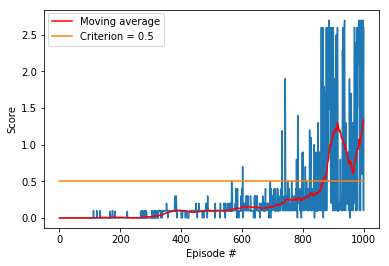

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(len(scores)), running_mean, label='Moving average', color='red')
plt.plot(np.arange(len(scores)), np.zeros(len(scores))+0.5, label='Criterion = 0.5')
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)
fig.savefig('result.png')
plt.show()

### 5. Plot training result

In [10]:
fig = plt.figure()

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(len(scores)), running_mean, label='Moving average', color='red')
plt.plot(np.arange(len(scores)), np.ones(len(scores))+30, label='Criterion = 30')
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)
fig.savefig('result.png')
plt.show()

NameError: name 'plt' is not defined

### 6. Watch trained Agents playing tennis
Important to set 
```python
env_info = env.reset(train_mode=False)[brain_name]
```

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
from maddpg_agent import MADDPG

env = UnityEnvironment(file_name="env/Tennis.x86_64")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]
# number of agents 
num_agents = len(env_info.agents)
# size of each action
action_size = brain.vector_action_space_size
# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]

m_agents = MADDPG(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=10)

m_agents.loadCheckPoints()

while True:
    actions = m_agents.act(states, add_noise=False)
    env_info = env.step(actions)[brain_name]
    dones = env_info.local_done
    next_states = env_info.vector_observations         # get next state (for each agent)
    states = next_states
    if np.any(dones):                                  # exit loop if episode finished
                break

env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 
